<a href="https://colab.research.google.com/github/Aya-Elgammal/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

In [58]:
data = pd.read_excel("depression_anxiety_data..xlsx")
data.head(10)

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3,False
5,6,1,18,male,22.129740,Normal,3,None-minimal,False,False,False,False,2,None-minimal,False,False,False,2,False
6,7,1,18,male,22.408787,Normal,6,Mild,False,False,False,False,4,None-minimal,False,False,False,3,False
7,8,1,19,male,20.482476,Normal,4,None-minimal,False,False,False,False,9,Mild,False,False,False,5,False
8,9,1,20,male,21.227888,Normal,11,Moderate,True,False,False,False,8,Mild,False,False,False,7,False
9,10,1,19,male,24.489796,Normal,6,Mild,False,False,False,False,4,None-minimal,False,False,False,9,False


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   783 non-null    object 
 8   depressiveness        783 non-null    bool   
 9   suicidal              783 non-null    bool   
 10  depression_diagnosis  783 non-null    bool   
 11  depression_treatment  783 non-null    bool   
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           783 non-null    bool   
 15  anxiety_diagnosis     7

In [60]:
data.describe()

,id,school_year,age,bmi,phq_score,gad_score,epworth_score
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,392.000000,2.277139,20.233716,23.420533,7.123883,6.810983,6.311622
std,226.176922,1.163633,1.767217,4.563630,4.426580,4.727352,4.027394
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,1.000000,19.000000,20.989420,4.000000,3.000000,3.000000
50%,392.000000,2.000000,20.000000,23.140496,6.000000,6.000000,6.000000
75%,587.500000,3.000000,21.000000,25.519924,9.000000,9.000000,9.000000
max,783.000000,4.000000,31.000000,54.552668,24.000000,21.000000,32.000000


<Axes: xlabel='age'>

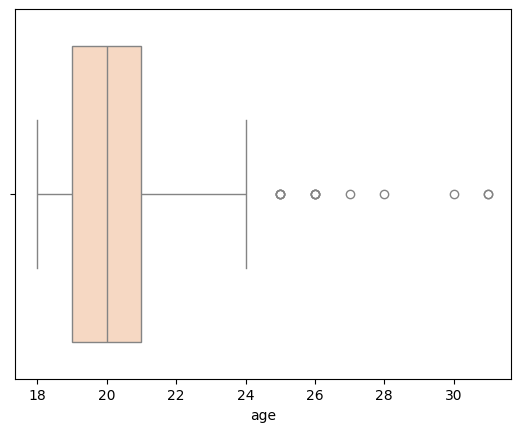

In [61]:
sns.boxplot(x=data['age'],color='#FFD6BA')

#<font color='819A91'>**Note➞**In the "age" column, the majority of values fall between 18–24 years. However, a few rare values such as 26, 28, 30,and 31 were observed. These values are considered valid and reasonable, possibly representing students returning to education or those who experienced academic delays. Therefore, they were retained in the analysis.</font>




<Axes: xlabel='bmi'>

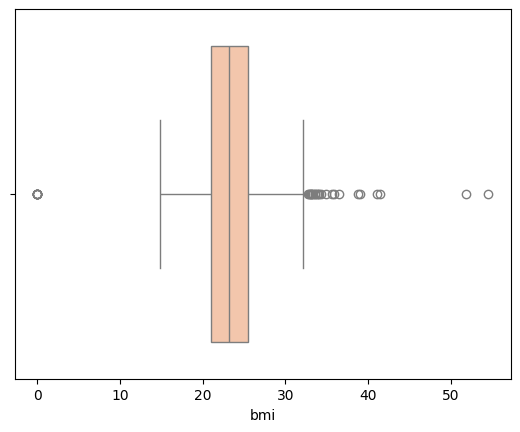

In [62]:
sns.boxplot(x=data['bmi'],color='#ffc3a0')

In [63]:
data[data["bmi"]<=10].shape[0]

8

In [64]:
data[data["bmi"]>30].shape[0]

37

<font color='819A91'>
Note: 8 rows with BMI values ≤ 10 were identified. These values are medically implausible and were considered data entry errors. They were removed from the dataset to ensure accuracy.
</font>


<font color='819A91'>
Note: 37 individuals had a BMI greater than 30, which falls under the obesity category. These values are medically valid and were retained for further analysis.
</font>

In [65]:
data=data[data['bmi']>10]

<Axes: xlabel='epworth_score'>

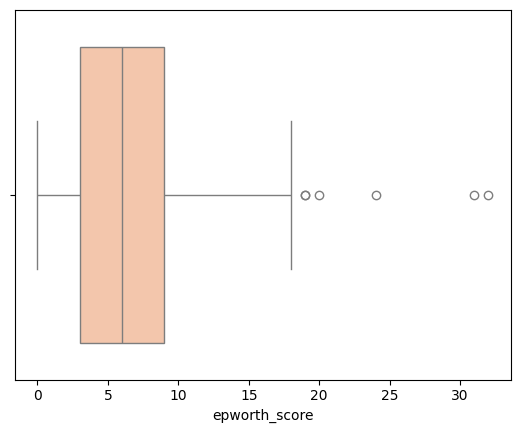

In [66]:
sns.boxplot(x=data['epworth_score'],color='#ffc3a0')

In [67]:
data[data["epworth_score"]>=18].shape[0]

11

In [68]:
mean_epworth = round(data[data["epworth_score"]<=18]["epworth_score"].mean())
data.loc[data["epworth_score"] >18, "epworth_score"] = mean_epworth

##Statistical analysis


In [69]:
data[["age", "bmi", "phq_score", "gad_score", "epworth_score"]].describe()

,age,bmi,phq_score,gad_score,epworth_score
count,775.00000,775.000000,775.000000,775.000000,775.000000
mean,20.24000,23.662293,7.138065,6.849032,6.166452
std,1.76872,3.913308,4.437657,4.730917,3.690117
min,18.00000,14.880952,0.000000,0.000000,0.000000
25%,19.00000,21.101728,4.000000,3.000000,3.000000
50%,20.00000,23.183391,6.000000,6.000000,6.000000
75%,21.00000,25.535446,9.000000,9.000000,9.000000
max,31.00000,54.552668,24.000000,21.000000,18.000000


# <font color='819A91'> Distribution of Mental Health Indicators
 </font>

In [70]:
print("Depression Cases:\n", data["depressiveness"].value_counts(), "\n")
print("Anxiety Cases:\n", data["anxiousness"].value_counts(), "\n")
print("Sleepiness Cases:\n", data["sleepiness"].value_counts(), "\n")
print("Depression Severity:\n", data["depression_severity"].value_counts(), "\n")
print("Anxiety Severity:\n", data["anxiety_severity"].value_counts(), "\n")

Depression Cases:
 depressiveness
False    565
True     210
Name: count, dtype: int64 

Anxiety Cases:
 anxiousness
False    585
True     190
Name: count, dtype: int64 

Sleepiness Cases:
 sleepiness
False    635
True     140
Name: count, dtype: int64 

Depression Severity:
 depression_severity
Mild                 341
None-minimal         235
Moderate             139
Moderately severe     42
Severe                12
none                   6
Name: count, dtype: int64 

Anxiety Severity:
 anxiety_severity
Mild            301
None-minimal    283
Moderate        124
Severe           66
0                 1
Name: count, dtype: int64 



In [71]:
data["anxiety_severity"] = data["anxiety_severity"].replace("0", "None-minimal")
data["depression_severity"] = data["depression_severity"].replace("none", "None-minimal")

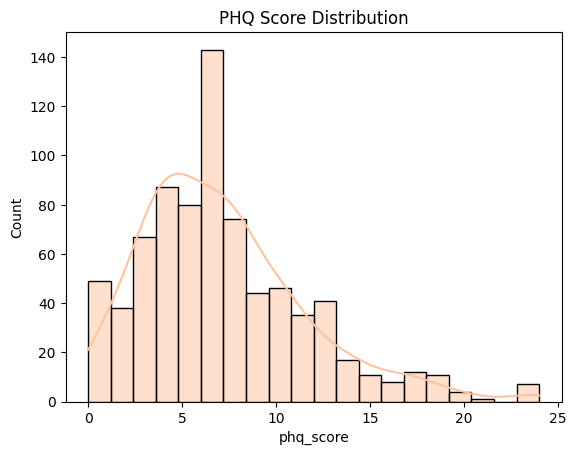

In [72]:
sns.histplot(data["phq_score"], kde=True, bins=20 ,color='#ffc3a0')
plt.title("PHQ Score Distribution")
plt.show()

<font color='819A91'>Although the PHQ score distribution is right-skewed, this reflects the nature of mental health data, where most individuals exhibit mild symptoms and only a few experience severe depression.</font>


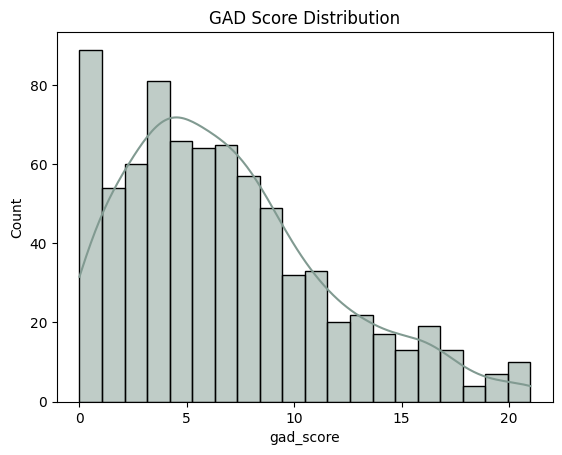

In [73]:
sns.histplot(data["gad_score"], kde=True, bins=20,color='#819A91')
plt.title("GAD Score Distribution")
plt.xlabel("gad_score")
plt.show()

<font color='#ffc3a0'>The distribution of GAD scores is right-skewed, indicating that the majority of students have mild to moderate anxiety levels. A smaller portion of the students reported high anxiety scores, which is consistent with expected mental health patterns among university students.</font>


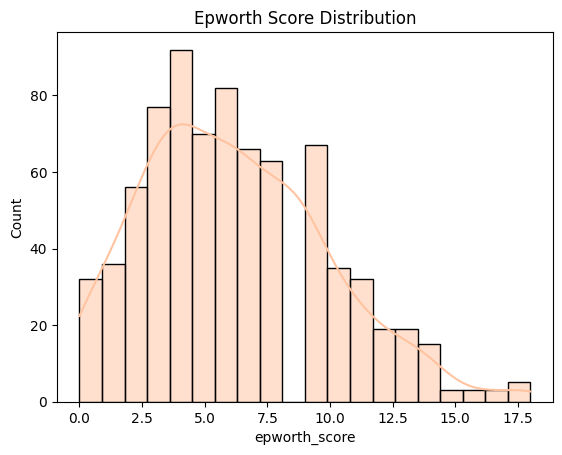

In [74]:
sns.histplot(data["epworth_score"], kde=True, bins=20, color='#ffc3a0')
plt.title("Epworth Score Distribution")
plt.xlabel("epworth_score")
plt.ylabel("Count")
plt.show()

**<font color='819A91'>The distribution of Epworth scores is right-skewed, with most students scoring between 3 and 9. This suggests that excessive daytime sleepiness is not widespread among the students, although a small number of high scores do exist.**


<font color='#ffc3a0'> Summary of Numerical Feature Distributions


**Age**: Most students are between **18 and 23 years old**, which is consistent with the expected university population. A few older students (up to 31) were kept, assuming late or returning students.

- **BMI**: The BMI values are **moderately right-skewed**. Most students fall within the **normal to slightly overweight** range, with a few outliers both low and high.

- **PHQ Score (Depression)**: The distribution is **right-skewed**, indicating that the **majority of students exhibit mild to moderate depressive symptoms**, with fewer cases in the severe range.

- **GAD Score (Anxiety)**: Also **right-skewed**, showing that **mild to moderate anxiety** is most common, while **high anxiety scores are less frequent**.

- **Epworth Score (Daytime Sleepiness)**: The distribution is **slightly right-skewed**, centered around 5–6. This suggests that **excessive daytime sleepiness is not widespread**, but present in a small portion of the population.


## <font color='819A91'>**Exploratory Visual Analysis**

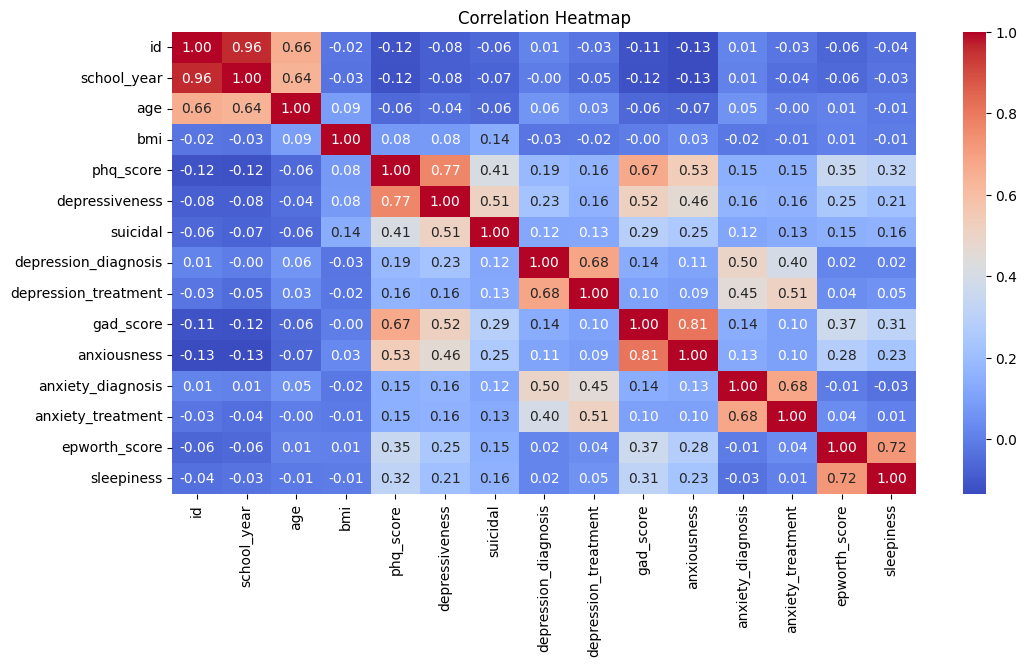

In [75]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


1. **Mental Health Links**  
   - Depression (`phq_score`) & anxiety (`gad_score`) are strongly correlated (**0.67**).  
   - Depression diagnosis & treatment show moderate correlation (**0.68**).  

2. **Suicide Risk**  
   - Suicidal thoughts link more to depression (**0.51**) than anxiety (**0.29**).  

3. **Sleep & Mental Health**  
   - Daytime sleepiness (`epworth_score`) ties to depression (**0.35**) and anxiety (**0.37**).  

4. **Demographics (Weak Impact)**  
   - Age, BMI, and school year show **no strong link** to mental health scores.  



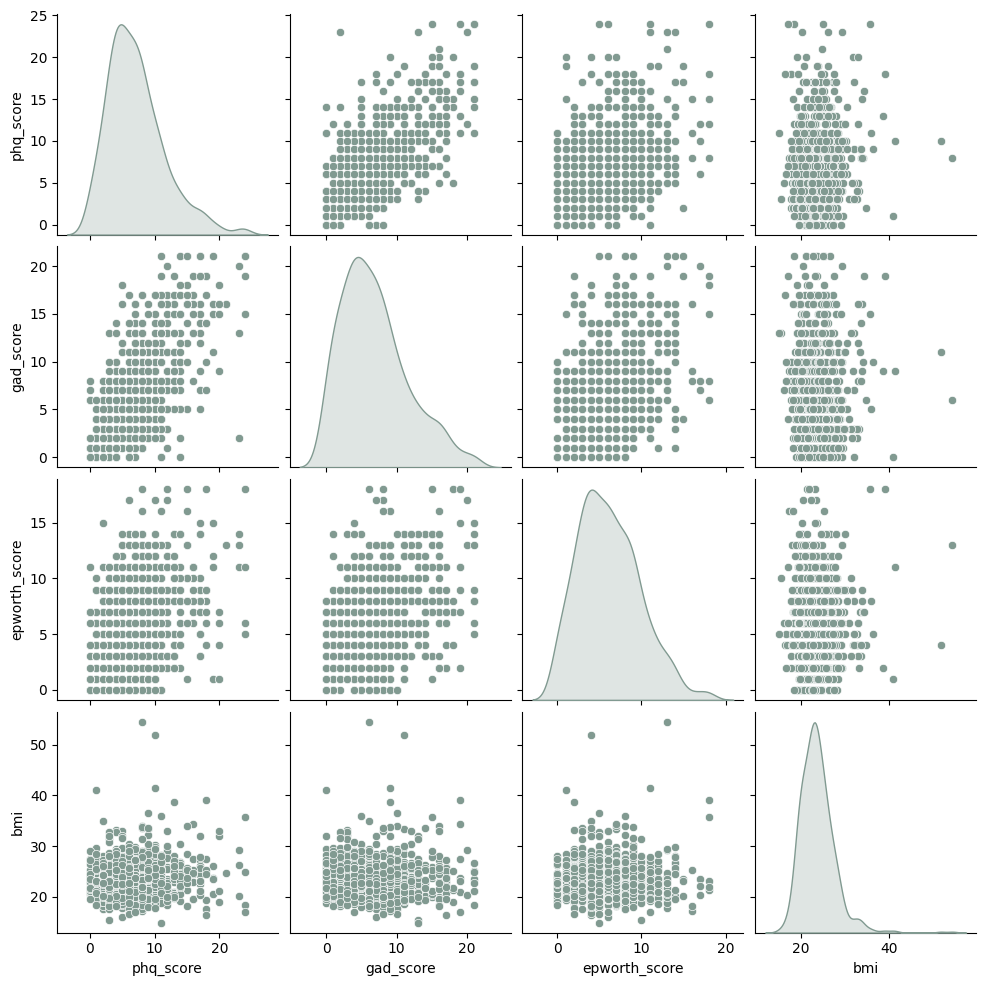

In [76]:
sns.pairplot(
    data[["phq_score", "gad_score", "epworth_score", "bmi"]],
    diag_kind='kde',
    plot_kws={"color": '#819A91'},
    diag_kws={"color": '#819A91'}
)
plt.show()


- There is a **strong positive correlation** between PHQ Score (Depression) and GAD Score (Anxiety).
- **Epworth Score (Sleepiness)** shows no clear correlation with PHQ or GAD scores.
- **BMI** appears to be **independent** of the other variables — no visible trend or pattern.
- All scores (`phq_score`, `gad_score`, `epworth_score`) are **right-skewed**, with most values concentrated at the lower end.


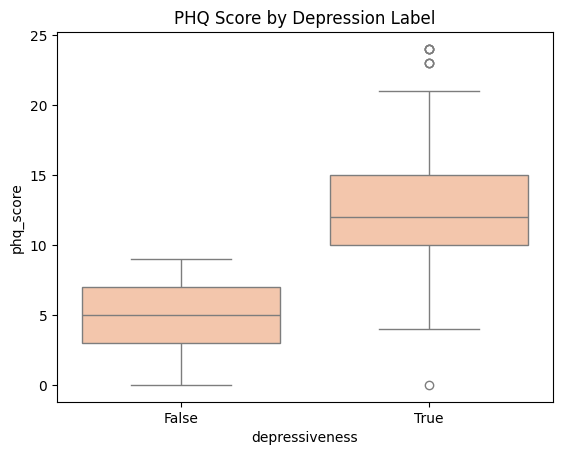

In [77]:
sns.boxplot(x="depressiveness", y="phq_score", data=data ,color='#ffc3a0')
plt.title("PHQ Score by Depression Label")
plt.show()


- Individuals labeled as **depressed (`True`)** show significantly **higher PHQ scores** compared to non-depressed (`False`) individuals.
- The median PHQ score for depressed individuals is around **13**, while it is around **5** for non-depressed individuals.
- This indicates that **PHQ score is a strong predictor** for identifying depressive tendencies.


/tmp/ipython-input-78-1948216975.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#ffc3a0'` for the same effect.

  sns.countplot(x="depressiveness", hue="anxiousness", data=data,color='#ffc3a0')


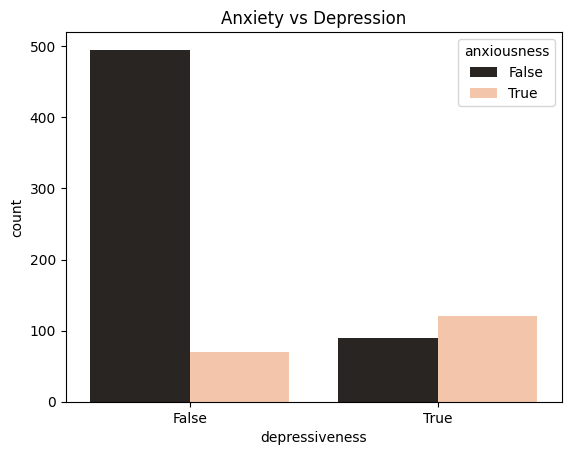

In [78]:
sns.countplot(x="depressiveness", hue="anxiousness", data=data,color='#ffc3a0')
plt.title("Anxiety vs Depression")
plt.show()

/tmp/ipython-input-79-687874879.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#ffc3a0'` for the same effect.

  sns.countplot(x="depressiveness", hue="sleepiness", data=data,color='#ffc3a0')


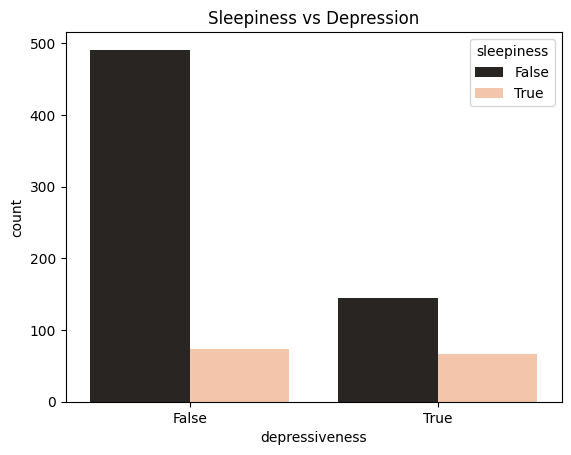

In [79]:
sns.countplot(x="depressiveness", hue="sleepiness", data=data,color='#ffc3a0')
plt.title("Sleepiness vs Depression")
plt.show()



---

- Among those **not depressed**, the majority also **did not report anxiety**.
- Among those **depressed**, a larger proportion reported being **anxious**.
- This visual supports a **strong association between anxiety and depression**, suggesting comorbidity (co-occurrence) is common in the dataset.


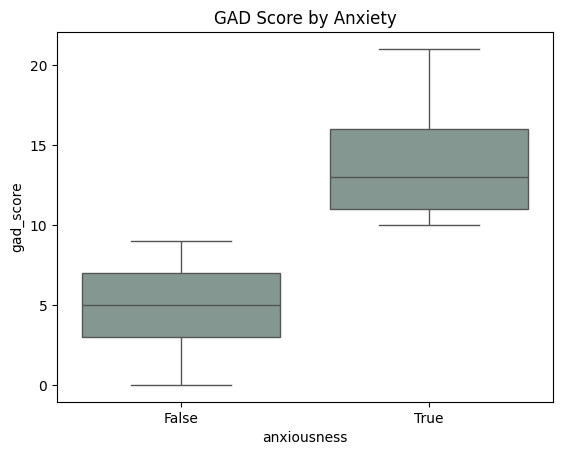

In [80]:
sns.boxplot(x="anxiousness", y="gad_score", data=data,color ='#819A91')
plt.title("GAD Score by Anxiety")
plt.show()

---

- Among those **not depressed**, the majority also **did not report anxiety**.
- Among those **depressed**, a larger proportion reported being **anxious**.
- This visual supports a **strong association between anxiety and depression**, suggesting comorbidity (co-occurrence) is common in the dataset.
wanna like this

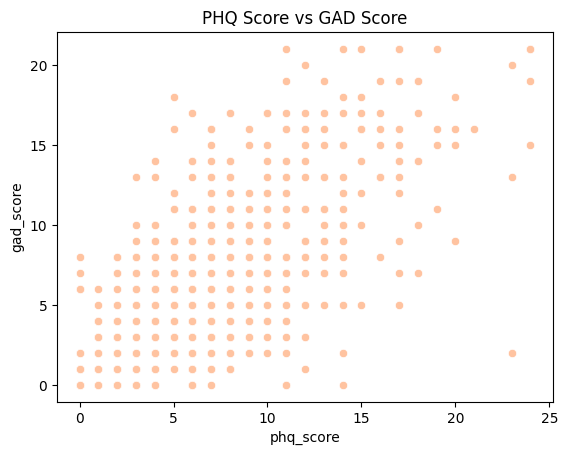

Correlation: 0.67


In [81]:
sns.scatterplot(x="phq_score", y="gad_score", data=data,color='#ffc3a0')
plt.title("PHQ Score vs GAD Score")
plt.show()

# Or check correlation directly:
correlation = data["phq_score"].corr(data["gad_score"])
print(f"Correlation: {correlation:.2f}")



- **Positive Correlation:** Higher PHQ (depression) scores strongly associate with higher GAD (anxiety) scores, reinforcing **comorbidity**.  
- **Trend Line Slope:** Steep slope suggests a **near-linear relationship**—worsening depression often accompanies worsening anxiety.  
- **Clinical Clusters:**  
  - **Low scores (0–5):** Likely healthy/no diagnosis.  
  - **Moderate (5–15):** Subthreshold/mild symptoms.  
  - **High (15+):** Potential clinical cases (severe depression/anxiety).  


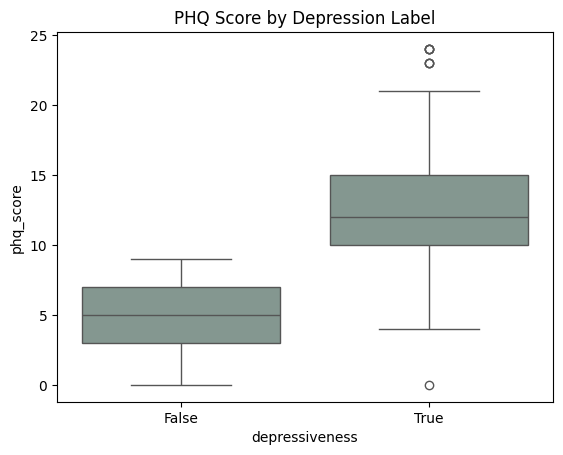

In [82]:
sns.boxplot(x="depressiveness", y="phq_score", data=data,color ='#819A91')
plt.title("PHQ Score by Depression Label")
plt.show()


1. **PHQ scores effectively differentiate** depressed vs. non-depressed groups.  
2. **Threshold Clarity:** Supports using PHQ-9 as a screening tool (e.g., scores ≥ 10 warrant intervention).  
3. **Consistency with Prior Data:** Reinforces the **depression-anxiety link**—high PHQ ("True") groups likely overlap with high GAD scores.  

**Takeaway:** The PHQ score distribution validates its use for **depression classification** and highlights **severe cases needing priority care**.  


In [83]:
features = [
    "phq_score", "gad_score", "epworth_score", "bmi",
    "school_year", "age", "gender"
]
data_encoded = pd.get_dummies(data[features], drop_first=True)

In [84]:
X = data_encoded
y = data["depressiveness"].astype(int)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[113   0]
 [  2  40]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.95      0.98        42

    accuracy                           0.99       155
   macro avg       0.99      0.98      0.98       155
weighted avg       0.99      0.99      0.99       155



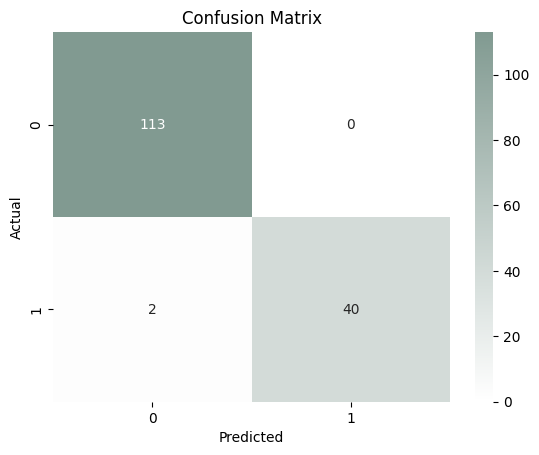

In [89]:
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#819A91"])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=custom_cmap)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()